In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tabulate import tabulate

data_path = 'results/q-learning/20/'

In [23]:
rewards         = pd.read_csv(data_path + 'rewards.csv')
steps           = pickle.load(open(data_path + 'steps.pkl', 'rb'))
trajectories    = pickle.load(open(data_path + 'trajectories.pkl', 'rb'))
returns         = pickle.load(open(data_path + 'returns.pkl', 'rb'))

In [24]:
rewards = np.array(rewards)
steps = np.array(steps)
trajectories = [np.array(trajectory) for trajectory in trajectories]
returns = np.array(returns)

╒══════════╤══════════╤═════════╕
│ Metric   │     Mean │     Std │
╞══════════╪══════════╪═════════╡
│ Returns  │ -132.113 │ 47.6155 │
├──────────┼──────────┼─────────┤
│ Steps    │   70.127 │ 13.3321 │
╘══════════╧══════════╧═════════╛


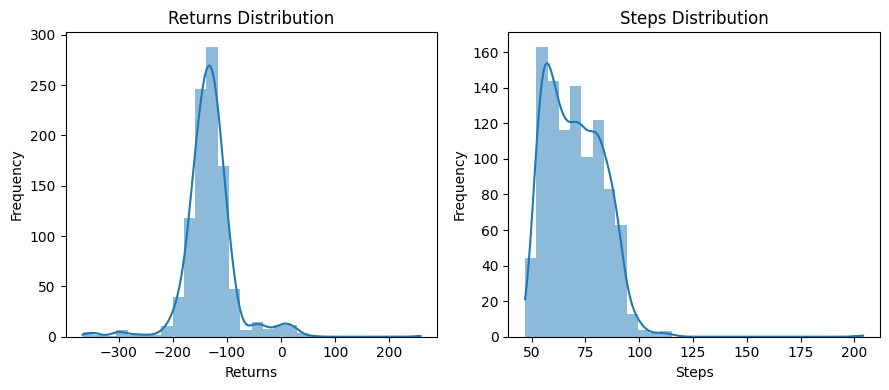

In [25]:
# Returns and Steps distribution
table = [
    ['Returns', returns.mean(), returns.std()],
    ['Steps', steps.mean(), steps.std()]
]
print(tabulate(table, headers=['Metric', 'Mean', 'Std'], tablefmt='fancy_grid'))

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(returns, ax=ax[0], bins=30, kde=True, edgecolor=None)
ax[0].set_title('Returns Distribution')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('Frequency')

sns.histplot(steps, ax=ax[1], bins=30, kde=True, edgecolor=None)
ax[1].set_title('Steps Distribution')
ax[1].set_xlabel('Steps')
ax[1].set_ylabel('Frequency')

fig.tight_layout()
# Save pdf
plt.savefig(f'{data_path}distributions_plot.pdf')
plt.show()

## Returns comparison

In [26]:
import pickle

returns_dqn = pickle.load(open('results/dqn/returns.pkl', 'rb'))
returns_aac = pickle.load(open('results/aac/returns.pkl', 'rb'))
returns_ppo = pickle.load(open('results/ppo/returns.pkl', 'rb'))

/tmp/ipykernel_31278/66261792.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['AAC', 'PPO'])


Text(0, 0.5, 'Returns')

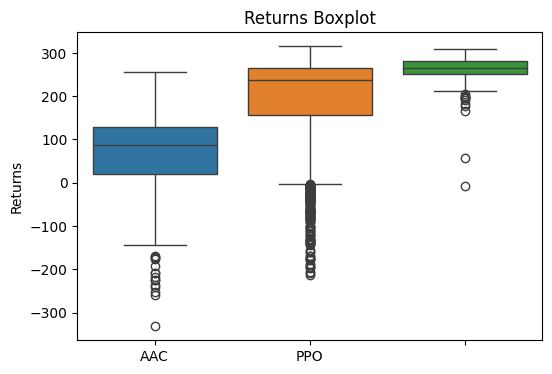

In [27]:
# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.boxplot(data=[returns_dqn, returns_aac, returns_ppo], ax=ax)
ax.set_xticklabels(['AAC', 'PPO'])
ax.set_title('Returns Boxplot')
ax.set_ylabel('Returns')


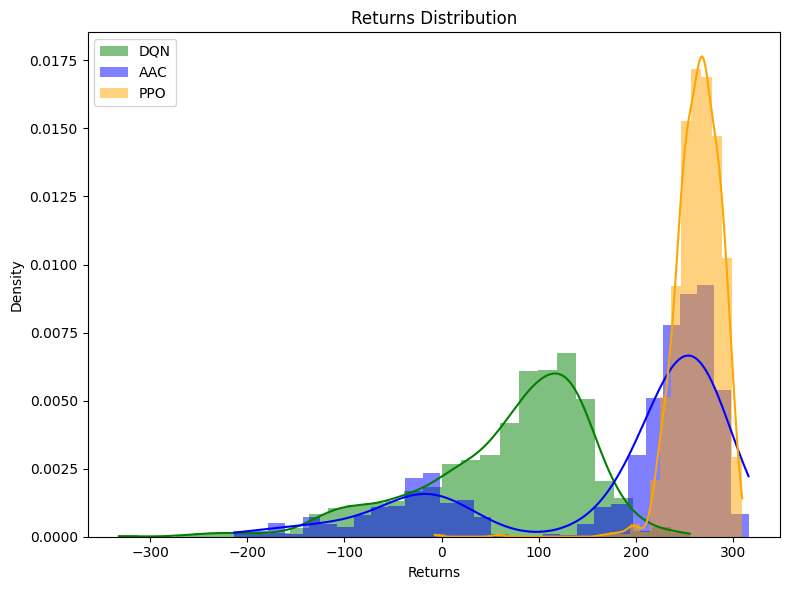

In [29]:
# Overlapping Histograms
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.histplot(returns_dqn, ax=ax, bins=30, kde=True, edgecolor=None, color='green', label='DQN', stat='density')
sns.histplot(returns_aac, ax=ax, bins=30, kde=True, edgecolor=None, color='blue', label='AAC', stat='density')
sns.histplot(returns_ppo, ax=ax, bins=30, kde=True, edgecolor=None, color='orange', label='PPO', stat='density')

ax.set_title('Returns Distribution')
ax.set_xlabel('Returns')
ax.set_ylabel('Density')
ax.legend()

fig.tight_layout()

# Save png
plt.savefig(f'results/comparison_plot.png')


## Policy interpretation